In [1]:
import os
from PIL import Image

from torchvision import transforms, datasets, models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import shutil
import random
import copy
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from datetime import datetime

## 1) Augmentasi Data

In [ ]:
input_dataset_path = "Daun"
output_dataset_path = "Daun_Augmented"

In [ ]:
class_names = ['Bercak', 'Berkerut', 'Berputar', 'Menggulung', 'Menguning']
for class_name in class_names:
    class_dir = os.path.join(output_dataset_path, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

In [ ]:
def random_rotation(img):
    angle = random.choice([0, 90, 180, 270, -90, -180, -270])
    return transforms.functional.rotate(img, angle)

In [ ]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # crop dan resize secara random dengan skala antara 0.8 hingga 1.0 dari ukuran asli.
    transforms.Lambda(lambda img: random_rotation(img)),  # Rotasi acak dengan fungsi di atas.
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.3),  # Mengubah tingkat kecerahan gambar secara acak hingga ±30%.
])

# fungsi untuk memproses dan menyimpan gambar-gambar hasil
def process_and_save_image(input_image_path, output_image_path):
    try:

        image = Image.open(input_image_path).convert('RGB')

        # Menerapkan transformasi
        augmented_image = transform(image)

        # Menyimpan gambar-gambar yang telah teraugmentasi
        augmented_image.save(output_image_path)
        print(f"Saved processed image: {output_image_path}")

    except Exception as e:
        print(f"Error processing image {input_image_path}: {e}")
        print(f"Exception details: {e.__class__.__name__}: {e}")

In [ ]:
def augmenting(input_path, output_path, class_names, augment_count):
    for class_name in class_names:
        input_path_dir = os.path.join(input_path, class_name)
        output_path_dir = os.path.join(output_path, class_name)

        if not os.path.exists(output_path_dir):
            os.makedirs(output_path_dir)

        if not os.path.exists(input_path_dir):
            print(f"Error : {input_path_dir} not found")
            continue

        images_files = sorted(os.listdir(input_path_dir))

        for idx, image_file in enumerate(images_files):
            if image_file.lower().endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(input_path_dir, image_file)
                img = Image.open(image_path)
                print(f"processing image: {image_path}")

                for i in range(augment_count):
                    output_image_name = f"{os.path.splitext(image_file)[0]}_aug_{i + 1}.jpg"
                    output_image_path = os.path.join(output_path_dir, output_image_name)

                    process_and_save_image(image_path, output_image_path)

    print(f'augmentation complete !!')

In [ ]:
augment_count = 5
class_names = ['Bercak', 'Berkerut', 'Berputar', 'Menggulung', 'Menguning']

In [ ]:
augmenting(input_dataset_path, output_dataset_path, class_names, augment_count)

processing image: Daun\Bercak\bercak_1.JPG
Saved processed image: Daun_Augmented\Bercak\bercak_1_aug_1.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_1_aug_2.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_1_aug_3.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_1_aug_4.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_1_aug_5.jpg
processing image: Daun\Bercak\bercak_10.JPG
Saved processed image: Daun_Augmented\Bercak\bercak_10_aug_1.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_10_aug_2.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_10_aug_3.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_10_aug_4.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_10_aug_5.jpg
processing image: Daun\Bercak\bercak_11.JPG


Saved processed image: Daun_Augmented\Bercak\bercak_11_aug_1.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_11_aug_2.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_11_aug_3.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_11_aug_4.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_11_aug_5.jpg
processing image: Daun\Bercak\bercak_12.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_12_aug_1.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_12_aug_2.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_12_aug_3.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_12_aug_4.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_12_aug_5.jpg
processing image: Daun\Bercak\bercak_13.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_13_aug_1.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_13_aug_2.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_13_aug_3.jpg
Saved processed image: Daun_Augmented\Bercak\bercak_13_aug_4.jpg
Sa

## 2) Resizing and Spliting

In [ ]:
input = "Daun_Augmented"
output = "Daun_Splited"

In [ ]:
train_dir = os.path.join(output, 'train')
test_dir = os.path.join(output, 'test')
val_dir = os.path.join(output, 'val')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

transform_size = (227, 227)

In [ ]:
for class_name in class_names:
    class_dir = os.path.join(input, class_name)
    if not os.path.exists(class_dir):
        print(f"Directory {class_dir} not found")
        continue

    train_class_dir = os.path.join(train_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)

    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(val_class_dir, exist_ok=True)

    images = [f for f in os.listdir(class_dir) if f.endswith(('jpg', 'jpeg', 'png'))]

    train_img, temp_img = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    test_img, val_img = train_test_split(temp_img, test_size=val_ratio/(val_ratio + test_ratio), random_state=42)

    for image_name in tqdm(train_img, desc=f'Processing {class_name} to train'):
        input_image_path = os.path.join(class_dir, image_name)
        with Image.open(input_image_path) as img:
            img = img.convert('RGB')
            img = img.resize(transform_size)

            img.save(os.path.join(train_class_dir, image_name))

    for image_name in tqdm(test_img, desc=f'Processing {class_name} to test'):
        input_image_path = os.path.join(class_dir, image_name)
        with Image.open(input_image_path) as img:
            img = img.convert('RGB')
            img = img.resize(transform_size)

            img.save(os.path.join(test_class_dir, image_name))

    for image_name in tqdm(val_img, desc=f'Processing {class_name} to val'):
        input_image_path = os.path.join(class_dir, image_name)
        with Image.open(input_image_path) as img:
            img = img.convert('RGB')
            img = img.resize(transform_size)

            img.save(os.path.join(val_class_dir, image_name))

Processing Bercak to train:   0%|          | 0/52 [00:00<?, ?it/s]

Processing Menguning to val: 100%|██████████| 10/10 [00:00<00:00, 56.12it/s]


## 3) Normalizing and Preparing Data

In [2]:
path = os.path.join(os.getcwd(), 'C:\Mbudhi\Kuliah\Program\CNN_Augmented.v2-alexnet_227x227_612pics_2025-03-15-1-16pm.folder')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_15036\292660229.py:1: SyntaxWarning: invalid escape sequence '\M'
  path = os.path.join(os.getcwd(), 'C:\Mbudhi\Kuliah\Program\CNN_Augmented.v2-alexnet_227x227_612pics_2025-03-15-1-16pm.folder')


In [3]:
obj_dt = datasets.ImageFolder(path, transform=transforms.ToTensor())
dataloader = DataLoader(obj_dt, batch_size=64, shuffle=False, num_workers=4)

In [4]:
mean = torch.zeros(3)
std = torch.zeros(3)

In [5]:
for images, _ in dataloader:
    for d in range(3):
        mean[d] += images[:, d, :, :].mean()
        std[d] += images[:, d, :, :].std()

mean.div_(len(obj_dt))
std.div_(len(obj_dt))

tensor([0.0046, 0.0046, 0.0054])

In [6]:
print(f'Mean : ', mean)
print(f'Std : ', std)

Mean :  tensor([0.0091, 0.0094, 0.0080])
Std :  tensor([0.0046, 0.0046, 0.0054])


In [7]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'test' : transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val' : transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

In [8]:
directory = 'C:\Mbudhi\Kuliah\Program\CNN_Augmented.v2-alexnet_227x227_612pics_2025-03-15-1-16pm.folder'

img_dt = {
    'train' : datasets.ImageFolder(os.path.join(directory, 'train'), data_transforms['train']),
    'test' : datasets.ImageFolder(os.path.join(directory, 'test'), data_transforms['test']),
    'val' : datasets.ImageFolder(os.path.join(directory, 'val'), data_transforms['val'])
}

dataloaders = {
    'train' : DataLoader(img_dt['train'], batch_size=16, shuffle=True, num_workers=2),
    'test' : DataLoader(img_dt['test'], batch_size=16, shuffle=True, num_workers=2),
    'val' : DataLoader(img_dt['val'], batch_size=16, shuffle=True, num_workers=2)
}

dt_sizes = {x: len(img_dt[x]) for x in ['train', 'test', 'val']}
class_names = img_dt['train'].classes

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_15036\2562457351.py:1: SyntaxWarning: invalid escape sequence '\M'
  directory = 'C:\Mbudhi\Kuliah\Program\CNN_Augmented.v2-alexnet_227x227_612pics_2025-03-15-1-16pm.folder'


## 4) Old Code

In [9]:
model = models.alexnet(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(model.classifier[6].in_features, len(class_names))

c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(9216, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Linear(4096, len(class_names))
)

model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [13]:
# Add this before training to verify model setup
print("Model configuration:")
print(model)
print("\nDevice:", device)
print("Memory allocated:", torch.cuda.memory_allocated() if torch.cuda.is_available() else "CPU")

Model configuration:
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_featur

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

num_epochs = 10
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

for epoch in range(num_epochs):
    print(f'Starting Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'val']:
        print(f'Starting {phase} phase')
        try:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                print(f'Processing batch {batch_idx}')
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dt_sizes[phase]
            epoch_acc = running_corrects.double() / dt_sizes[phase]

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc)
            else:  # validation
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        except Exception as e:
            print(f"Error in {phase} phase: {str(e)}")
            raise e

Starting Epoch 1/10
----------
Starting train phase
Processing batch 0
Processing batch 1
Processing batch 2
Processing batch 3
Processing batch 4
Processing batch 5
Processing batch 6
Processing batch 7
Processing batch 8
Processing batch 9
Processing batch 10
Processing batch 11
Processing batch 12
Processing batch 13
Processing batch 14
Processing batch 15
Processing batch 16
Processing batch 17
Processing batch 18
Processing batch 19
Processing batch 20
Processing batch 21
Processing batch 22
Processing batch 23
Processing batch 24
Processing batch 25
Processing batch 26
Processing batch 27
Processing batch 28
Processing batch 29
Processing batch 30
Processing batch 31
Processing batch 32
Processing batch 33
train Loss: 37.9797 Acc: 0.3180
Starting val phase
Processing batch 0
Processing batch 1
Processing batch 2
val Loss: 1.1052 Acc: 0.6765
Starting Epoch 2/10
----------
Starting train phase
Processing batch 0
Processing batch 1
Processing batch 2
Processing batch 3
Processing ba

In [15]:
model.load_state_dict(best_model_wts)

date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
training_note = "alex_daun"

model_save_path = f"{training_note}_{date}.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to alex_daun_2025-05-05_14-55-23.pth


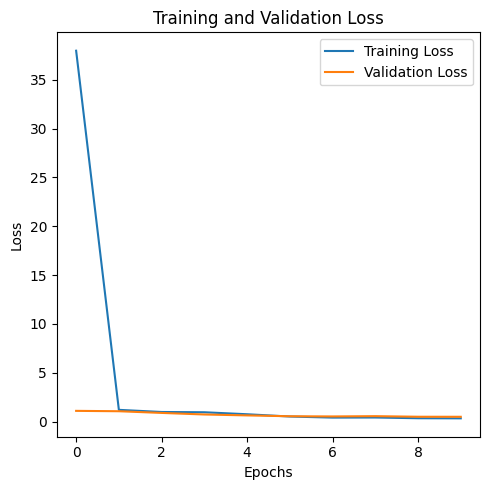

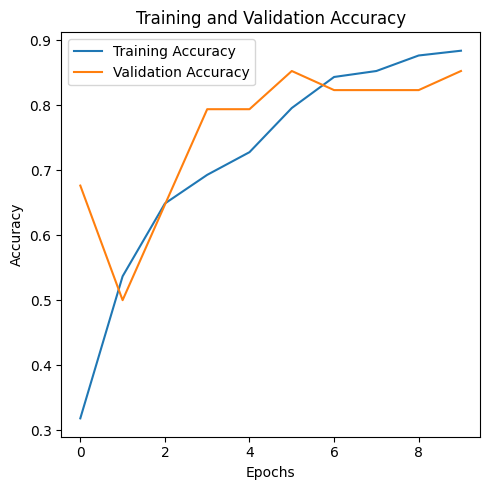

In [16]:
#membuat fungsi visualisasi untuk train_loss dan validation_loss
def plot_loss(train_loss, val_loss, save=True):
    plt.figure(figsize=(5, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.tight_layout()

    if save:
        # Create training_stat directory if it doesn't exist
        os.makedirs('./training_stat', exist_ok=True)

        # Save the plot with timestamp
        plt.savefig(f'./training_stat/loss_plot_{training_note}_{date}.png')

    plt.show()

def plot_accuracy(train_acc, val_acc, save=True):
    plt.figure(figsize=(5, 5))
    plt.plot([x.cpu().numpy() for x in train_acc], label='Training Accuracy') # Convert to NumPy after moving to CPU
    plt.plot([x.cpu().numpy() for x in val_acc], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.tight_layout()

    if save:
        # Create training_stat directory if it doesn't exist
        os.makedirs('./training_stat', exist_ok=True)

        # Save the plot with timestamp
        plt.savefig(f'./training_stat/accuracy_plot_{training_note}_{date}.png')

    plt.show()

# Call the functions to visualize the training history
plot_loss(train_losses, val_losses)
plot_accuracy(train_accs, val_accs)

## 5) Old model Evaluation

In [17]:
model = models.alexnet(pretrained=False)

model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(9216, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Linear(4096, len(class_names))
)

c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [18]:
model.load_state_dict(torch.load(model_save_path))
model = model.to(device)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
correct = 0
total = 0

all_labels = []
predictions = []

In [20]:
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print(f'Total data to test : ' + str(total))
print(f'Total data correct : ' + str(correct))
print(f'Accuracy : {accuracy:.2f}%')

Total data to test : 34
Total data correct : 12
Accuracy : 35.29%


In [21]:
print(classification_report(all_labels, predictions, target_names=img_dt['test'].classes))

                 precision    recall  f1-score   support

    bercak_daun       0.60      0.43      0.50         7
  daun_berkerut       0.50      0.45      0.48        11
  daun_berputar       0.00      0.00      0.00         5
daun_menggulung       0.21      1.00      0.35         4
 daun_menguning       0.00      0.00      0.00         7

       accuracy                           0.35        34
      macro avg       0.26      0.38      0.26        34
   weighted avg       0.31      0.35      0.30        34



c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh